In [1]:
import pandas

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [4]:
df = pandas.read_csv('data/sentence_sets_trimmed.csv', encoding='unicode_escape', engine='python')

In [6]:
df

,applicant_id,document,writer_gender,letter_type,applicant_gender,applicant_identify,applicant_identify_group,standardized_lor,us_canadian,usmle_1,usmle_2,applicants_writers,TEXT,full_text,s1,s2,s1_s2,s3,full_text_tokens
0,male_3090,sentence_sets.csv.4358,female,lor,male,white,white,1,1,197,225,male_female,this letter serves as the department of medici...,this letter serves as the department of medici...,FIRST_NAME LAST_NAME * LAST_NAME waived his r...,this letter serves as the department of medici...,FIRST_NAME LAST_NAME * LAST_NAME waived his r...,these letters are written and compiled by the ...,526
1,female_267,sentence_sets.csv.4301,male,lor,female,asian - chinese,asian,1,1,203,227,female_male,this letter is written in support of FIRST_NAM...,this letter is written in support of FIRST_NAM...,this letter is written in support of FIRST_NAM...,she is reliable responsible and well reg...,this letter is written in support of FIRST_NAM...,our residents rotate in both inpatient and amb...,447
2,male_1004,sentence_sets.csv.179,male,lor,male,"hispanic, latino, or of spanish origin - mexic...",hispanic_latino_spanish,1,1,206,237,male_male,comments from anesthesiology rotations : â F...,comments from anesthesiology rotations FIRS...,comments from anesthesiology rotations FIRS...,he had excellent questions to showed his since...,comments from anesthesiology rotations FIRS..., *  *  * works hard always looking for w...,365
3,female_147,sentence_sets.csv.3846,male,lor,female,"hispanic, latino, or of spanish origin - other...",hispanic_latino_spanish,1,1,206,217,female_male,long number ms LAST_NAME had originally planne...,long number ms LAST_NAME had originally planne...,long number ms LAST_NAME had originally planne...,she took full advantage of the opportunity f...,long number ms LAST_NAME had originally planne...,2 I am not aware of any areas that require...,346
4,male_381,sentence_sets.csv.6,female,lor,male,black or african american - african american|b...,black or african american,1,1,210,225,male_female,â i think [ FIRST_NAME ] would be an asset t...,i think [ FIRST_NAME ] would be an asset to a...,i think [ FIRST_NAME ] would be an asset to an...,he's someone I look forward to speaking with a...,i think [ FIRST_NAME ] would be an asset to an...,* ucsd would be fortunate to get to keep this...,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3280,female_29,sentence_sets.csv.3354,male,chair,female,asian - chinese,asian,0,1,273,261,female_male,it is with pleasure that i recommend FIRST_NAM...,it is with pleasure that i recommend FIRST_NAM...,it is with pleasure that i recommend FIRST_NAM...,she was interested during rounds in all patien...,it is with pleasure that i recommend FIRST_NAM...,the medical icu rotation is a demanding rotati...,199
3281,female_292,sentence_sets.csv.4395,female,lor,female,asian - chinese,asian,0,1,273,261,female_female,we are very pleased to write this letter based...,we are very pleased to write this letter based...,we are very pleased to write this letter based...,she has waived her right to see this letter *...,we are very pleased to write this letter based...,id long number an outstanding graduating stu...,820
3282,male_651,sentence_sets.csv.1013,male,lor,male,asian - chinese,asian,0,1,274,277,male_male,| am writing this letter of recommendation for...,I am writing this letter of recommendation for...,I am writing this letter of recommendation for...,may long number mr * during his four weeks he...,I am writing this letter of recommendation for...,please do not hesitate to contact me if you ha...,288
3283,male_1930,sentence_sets.csv.2528,male,lor,male,asian - chinese,asian,0,1,274,277,male_male,it is my pleasure to write FIRST_NAME support ...,it is my pleasure to write FIRST_NAME support ...,it is my pleasure to write FIRST_NAME support ...,i am writing this letter to give my highest po...,it is my pleasure to write FIRST_NAME support ...,we began working on a

In [5]:
!pip install lexicalrichness

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 2.0 MB/s eta 0:00:002.8 MB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 8.3 MB/s eta 0:00:00m eta 0:00:010:01
  Created wheel for lexicalrichness: filename=lexicalrichness-0.5.1-py3-none-any.whl size=15416 sha256=d95a288f4977717e404bace98f9af7d4dd514b718dea5a850dfe7513e0b4cd83
  Stored in directory: /Users/benjamyu/Library/Caches/pip/wheels/bb/68/f4/1a32ae0aae29ce426b4e3c106a4e8e9c19fd13bcaff45c6a8e
Successfully built lexicalrichness


In [8]:
from lexicalrichness import LexicalRichness

def mtld(text):
    lex = LexicalRichness(text)
    return lex.mtld()

df['mtld'] = df['TEXT'].apply(mtld)

In [11]:
gender_mtld = df.groupby('writer_gender')['mtld'].mean().T

<Axes: title={'center': 'Lexical Diversity'}, xlabel='writer_gender'>

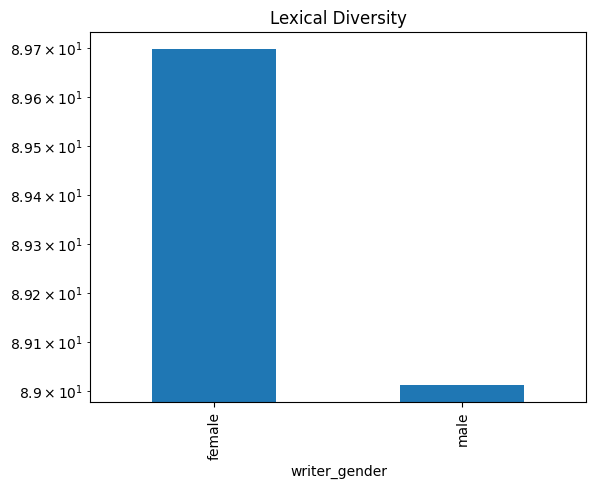

In [15]:
gender_mtld.plot(kind='bar', logy=True, title='Lexical Diversity')

In [16]:
appplicant_gender_mtld = df.groupby('applicant_gender')['mtld'].mean().T

<Axes: title={'center': 'Lexical Diversity'}, xlabel='applicant_gender'>

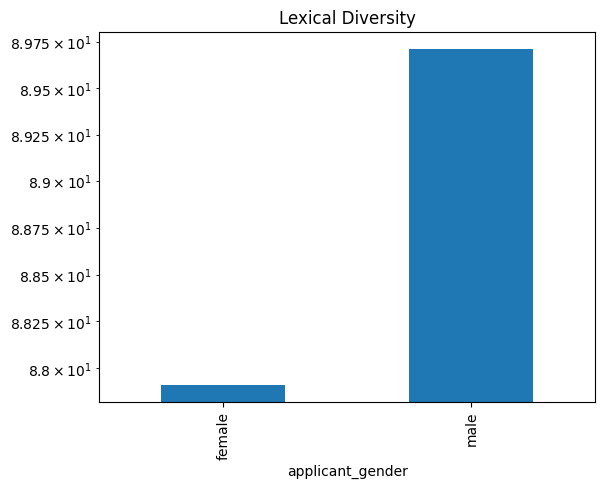

In [17]:
appplicant_gender_mtld.plot(kind='bar', logy=True, title='Lexical Diversity')